Algoritmo que detecta se uma pessoa pode ter ou não diabetes de acordo com os dados do dataset Pima Indians Diabetes.<br><br>
Dataset: https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes<br>
informações sobre o dataset: <br>
1 - Número de vezes grávida <br>
2 - Concentração de glicose <br>
3 - Pressão sanguínea<br>
4 - Triceps<br>
5 - Insulina<br>6 - Massa do corpo<br>
7 - Pedigree<br>
8 - Idade<br>
9 - Classe

In [1]:
import numpy as np
import pandas as pd

#libs gráficas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# import de funções estatisticas para criar nosso modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv('pima.csv', names = colunas)
df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#sumário estatístico
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#confire a distribuição das classes (balanceamento)
df.groupby('class').size()

class
0    500
1    268
dtype: int64

<h2>Correlação</h2>
Aqui podemos encontrar a correlação entre as variáveis do nosso dataset.

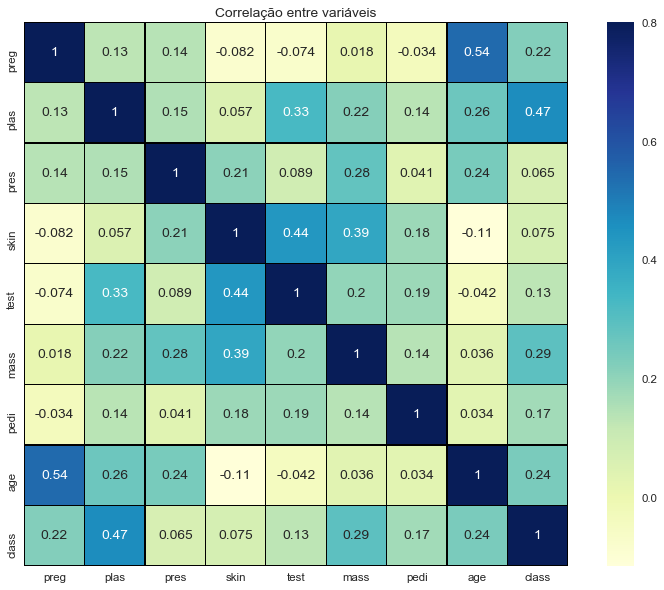

In [5]:
corr=df.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlação entre variáveis');

<h2>Separação dos dados em dados de treino, e dados de teste</h2>
Separamos os dados em dados de treino, e dados de teste. É importante, pois podemos criar nosso modelo com uma parte do nosso dataset, e usar a outra parte para fazer previsão.

In [6]:
# separando em dados de treino e teste
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<h2>Regressão Logística</h2>

Accuracy  80.72916666666666


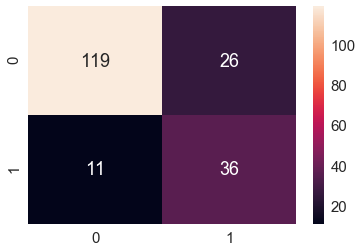

In [7]:
# modelo
LR = LogisticRegression()

# treinando o modelo
LR.fit(X_train, y_train)

# predição
y_pred = LR.predict(X_test)

# acurácia
print("Accuracy ", LR.score(X_test, y_test)*100)

# plotando a matriz de confusão
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<h2>Árvore de Decisão</h2>

Accuracy  69.27083333333334


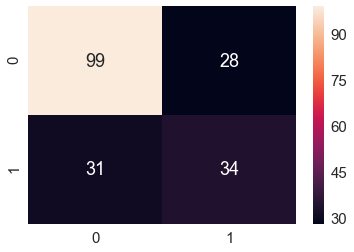

In [8]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# predição
y_pred = DT.predict(X_test)
print("Accuracy ", DT.score(X_test, y_test)*100)

# plot
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

<h2>Gradient Boosting</h2>

Accuracy  79.6875


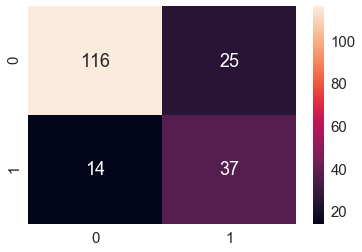

In [9]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# pred
y_pred = gb.predict(X_test)
print("Accuracy ", gb.score(X_test, y_test)*100)

# plot
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()